In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

#  Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)

#  CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model with augmentation
history = model.fit(datagen.flow(X_train, y_train_cat, batch_size=64),
                    epochs=5,
                    validation_data=(X_test, y_test_cat),
                    verbose=1)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", accuracy)

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))






Epoch 1/5


938/938 [==============================] - 53s 55ms/step - loss: 0.2890 - accuracy: 0.9086 - val_loss: 0.0775 - val_accuracy: 0.9747
Epoch 2/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0992 - accuracy: 0.9688 - val_loss: 0.0347 - val_accuracy: 0.9875
Epoch 3/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0713 - accuracy: 0.9782 - val_loss: 0.0392 - val_accuracy: 0.9869
Epoch 4/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0596 - accuracy: 0.9807 - val_loss: 0.0274 - val_accuracy: 0.9903
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0279 - accuracy: 0.9899
Test Accuracy: 0.9898999929428101
313/313 [==============================] - 2s 4ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99   

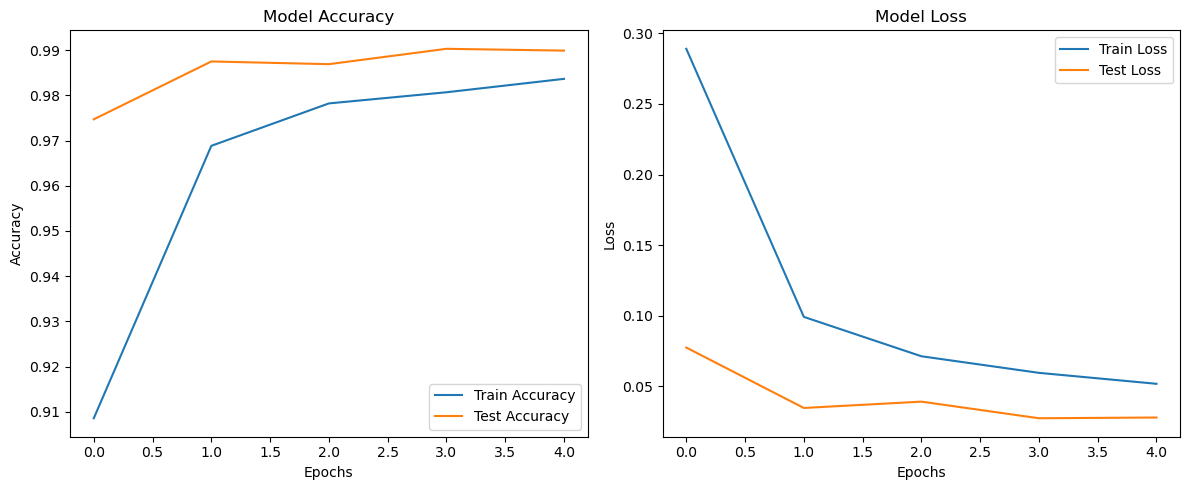

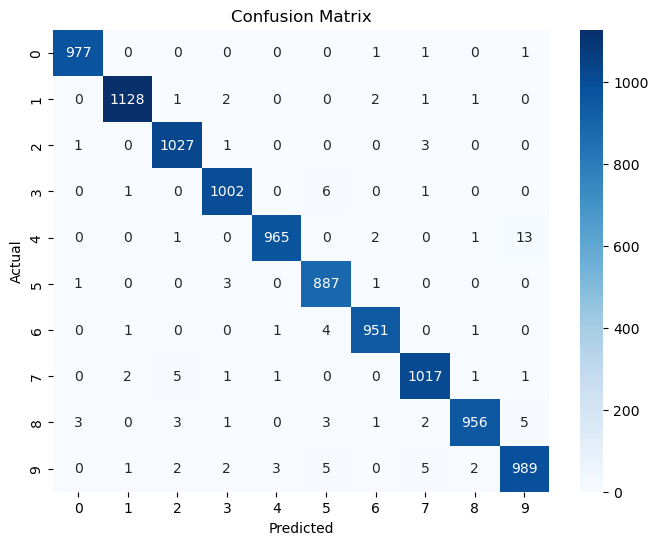

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot accuracy & loss curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion matrix heatmap
conf_mat = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
